In [1]:
import os
import pickle
import sys
sys.path.append("../")

import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm


from openbustools import plotting
from openbustools.traveltime import model_utils

In [2]:
model_order = [
    'AVGH',
    'AVGM',
    'PERT',
    'SCH',
    'FF','FF_TUNED',
    'FF_STATIC','FF_STATIC_TUNED',
    'FF_REALTIME','FF_REALTIME_TUNED',
    'CONV','CONV_TUNED',
    'CONV_STATIC','CONV_STATIC_TUNED',
    'CONV_REALTIME','CONV_REALTIME_TUNED',
    'GRU','GRU_TUNED',
    'GRU_STATIC','GRU_STATIC_TUNED',
    'GRU_REALTIME','GRU_REALTIME_TUNED',
    'TRSF','TRSF_TUNED',
    'TRSF_STATIC','TRSF_STATIC_TUNED',
    'TRSF_REALTIME','TRSF_REALTIME_TUNED',
    'DEEPTTE','DEEPTTE_TUNED',
    'DEEPTTE_STATIC','DEEPTTE_STATIC_TUNED',
]
experiment_order = [
    'same_city',
    'holdout',
    'diff_city'
]

In [3]:
all_res = []
all_out = []
for model_res_file in os.listdir("../results/kcm/"):
    res, out = model_utils.format_model_res(f"../results/kcm/{model_res_file}")
    all_res.append(res)
    all_out.append(out)
all_res = pd.concat(all_res)
all_out = pd.concat(all_out)

all_res['model_archetype'] = all_res['model'].str.split('_').str[0]
all_res['is_tuned'] = False
all_res.loc[all_res['model'].str.split('_').str[-1]=='TUNED', 'is_tuned'] = True
all_res['plot_order_model'] = all_res['model'].apply(lambda x: model_order.index(x))
all_res['plot_order_experiment'] = all_res['experiment_name'].apply(lambda x: experiment_order.index(x))
all_res = all_res.sort_values(['plot_order_model','plot_order_experiment'])
all_res

,model,experiment_name,fold,metric,value,model_archetype,is_tuned,plot_order_model,plot_order_experiment
0,AVGH,same_city,0,label_min,9.000000,AVGH,False,0,0
1,AVGH,same_city,0,label_max,3254.000000,AVGH,False,0,0
2,AVGH,same_city,0,label_mean,704.049339,AVGH,False,0,0
3,AVGH,same_city,0,pred_min,0.145525,AVGH,False,0,0
4,AVGH,same_city,0,pred_max,5510.559700,AVGH,False,0,0
...,...,...,...,...,...,...,...,...,...
149,GRU_REALTIME_TUNED,diff_city,4,mae,103.620651,GRU,True,21,2
150,GRU_REALTIME_TUNED,diff_city,4,rmse,10.179423,GRU,True,21,2
151,GRU_REALTIME_TUNED,diff_city,4,mape,0.300630,GRU,True,21,2
152,GRU_REALTIME_TUNED,diff_city,4,ex_var,0.757259,GRU,True,21,2


### Specific Model

<Axes: xlabel='value', ylabel='model'>

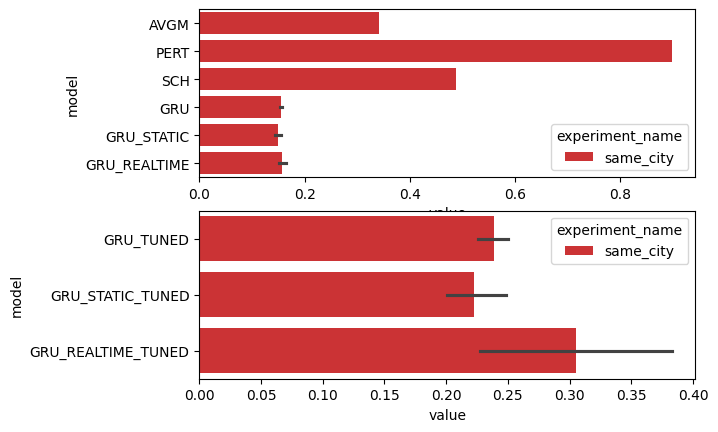

In [4]:
fig, axes = plt.subplots(2,1)
subset = all_res[all_res['metric']=='mape']
subset = subset[subset['experiment_name'].isin(['same_city'])]
subset = subset[subset['model_archetype'].isin(['AVGM','PERT','SCH','GRU'])]
sns.barplot(ax=axes[0], data=subset[subset['is_tuned']==False], x='value', y='model', hue='experiment_name', palette=plotting.PALETTE)
sns.barplot(ax=axes[1], data=subset[subset['is_tuned']==True], x='value', y='model', hue='experiment_name', palette=plotting.PALETTE)
# axes[0].set_xlim(0,0.5)
# axes[1].set_xlim(0,0.5)

In [5]:
subset = all_out[all_out['model']=='GRU']
subset = subset[subset['experiment_name']=='same_city']
subset = subset.sample(10000)

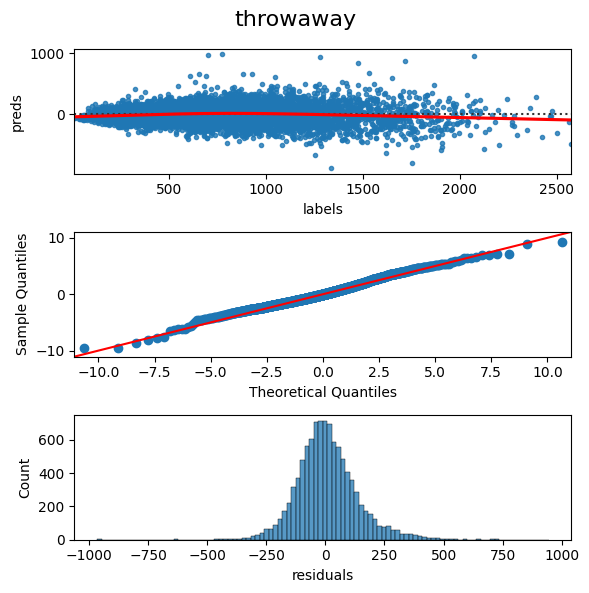

In [6]:
plotting.formatted_residuals_plot(subset)

### Ablation By Experiment

In [ ]:
subset = all_res[all_res['metric']=='mape']
subset = subset[subset['is_tuned']==False]
subset = subset[subset['model_archetype'].isin(['AVGM','PERT','SCH','FF','GRU','CONV','TRSF','DEEPTTE'])]
subset = subset[subset['experiment_name'].isin(['same_city'])]
sns.barplot(subset, x='value', y='model', hue='experiment_name', palette=plotting.PALETTE)
plt.xlim(0, 0.5)

In [ ]:
subset = all_res[all_res['metric']=='mape']
subset = subset[subset['is_tuned']==False]
subset = subset[subset['model_archetype'].isin(['AVGM','PERT','SCH','FF','GRU','CONV','TRSF','DEEPTTE'])]
subset = subset[subset['experiment_name'].isin(['holdout'])]
sns.barplot(subset, x='value', y='model', hue='experiment_name', palette=plotting.PALETTE)
plt.xlim(0, 0.5)

In [ ]:
subset = all_res[all_res['metric']=='mape']
subset = subset[subset['is_tuned']==False]
subset = subset[subset['model_archetype'].isin(['AVGM','PERT','SCH','FF','GRU','CONV','TRSF','DEEPTTE'])]
subset = subset[subset['experiment_name'].isin(['diff_city'])]
sns.barplot(subset, x='value', y='model', hue='experiment_name', palette=plotting.PALETTE)
plt.xlim(0, 0.5)

### Holdout Routes

In [ ]:
subset = all_res[all_res['metric']=='mape']
subset = subset[subset['is_tuned']==False]
subset = subset[subset['model_archetype'].isin(['AVGM','PERT','SCH','FF','GRU','CONV','TRSF','DEEPTTE'])]
subset = subset[subset['experiment_name'].isin(['same_city','holdout'])]
sns.barplot(subset, x='value', y='model', hue='experiment_name', palette=plotting.PALETTE)
plt.xlim(0, 0.5)

### Tuning

In [ ]:
subset = all_res[all_res['metric']=='mape']
subset = subset[subset['model'].isin(['AVGM','PERT','GRU','GRU_TUNED','TRSF','TRSF_TUNED'])]
subset = subset[subset['experiment_name'].isin(['same_city','diff_city'])]
sns.barplot(subset, x='value', y='model', hue='experiment_name', palette=plotting.PALETTE)
plt.xlim(0, 0.5)